## SET FUNCITONS WD AND VARIABLES NEEDED

In [1]:
import os

os.chdir('/Users/alexascunceparis/Desktop/BSC/immuno_project/TCRranker')

from find_contact_map import *
from mapping import *
from select_nr_set import *
from extract_contacts import *

seq_dict=parse_general_file('./structures_annotation/general.txt')

# Chain dictionary
general_df=pd.read_csv('./structures_annotation/general.txt', sep='\t')
chain_dict = {}
for pdb_id, group in general_df.groupby('pdb.id'):
    chains = {
            'tcra_chain': None,
            'tcrb_chain': None,
            'peptide_chain': None,
            'mhc_chain': None
        }
        
    for _, row in group.iterrows():
        if row['chain.component'] == 'TCR' and row['chain.type'] == 'TRA':
            chains['tcra_chain'] = row['chain.id']
        elif row['chain.component'] == 'TCR' and row['chain.type'] == 'TRB':
            chains['tcrb_chain'] = row['chain.id']
        elif row['chain.component'] == 'PEPTIDE':
            chains['peptide_chain'] = row['chain.id']
        elif row['chain.component'] == 'MHC' and row['chain.supertype'] == 'MHCI' and row['chain.type'] == 'MHCa':
            chains['mhc_chain'] = row['chain.id']
        
    chain_dict[pdb_id] = chains

/opt/miniconda3/envs/anarci/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Command

In [9]:
for file in os.listdir('./benchmark/training/'):
    pdb_id = file.split('_')[0]
    input_path=f'./input/input_df/{pdb_id}_df.csv'
    output_dir='./input/input_training'
    mv_cmmand=f'cp {input_path} {output_dir}'
    os.system(mv_cmmand)

cp: ./input/input_df/.DS_df.csv: No such file or directory


In [ ]:
import os
import subprocess


# Iterar sobre todos los archivos en el directorio './benchmark1/'
for input_file in os.listdir('./benchmark1/'):
    # Comprobar si el archivo empieza con 'filtered' y termina con '.csv'
    if input_file.endswith('.csv'):
        pdb_id = input_file.split('_')[0]  # Extraer el ID del PDB del nombre del archivo
        pdb_file_path = f'./pdb_nr/{pdb_id}.pdb'  # Ruta al archivo PDB
        
        # Mensaje de progreso para la ruta del archivo PDB
        print(f"Processing PDB file: {pdb_file_path}")

        # Extraer secuencias específicas del archivo PDB
        try:
            tcra_seq, tcrb_seq, pep_seq = extract_specific_sequences(pdb_file_path, seq_dict)
            print('Sequences extracted')
        except Exception as e:
            print(f"Error extracting sequences from {pdb_file_path}: {e}")
            continue  # Pasar al siguiente archivo si ocurre un error

        # Comando para ejecutar el script main.py
        command = [
            'python3', 'main_fast.py',
            '-p', './pdb_files/',
            '-t', f'./benchmark1/{input_file}',  # Usar el archivo de entrada actual
            '-e', f'{pep_seq}',  # Secuencia de péptido
            '-m', './input/input_MHCs.csv',
            '-pp', './model/TCRen_TCR_p.csv',
            '-mhcp', './model/TCRen_TCR_MHC.csv',
            '-g', './structures_annotation/general.txt',
            '-metric', 'TCRdist',
            '-s', f'scores_{pdb_id}.csv'  # Archivo de salida
        ]

        # Mensaje de progreso antes de ejecutar el comando
        print(f"Running command: {' '.join(command)}")

        # Ejecutar el comando
        try:
            subprocess.run(command, check=True)
            print(f"Successfully processed {pdb_id} and generated scores_{pdb_id}.csv")
        except subprocess.CalledProcessError as e:
            print(f"Error occurred while processing {pdb_id}: {e}")

print("All files processed.")

## COGNATE TCR-RANK

In [68]:
import os
import shutil

# Directory for human test files
human_test_dir = './benchmark1/benchmark1/human_test'
other_dir = './benchmark1/benchmark1/other'

# Output directories
human_test_output = './output/Benchmark/testing_model_all/'
other_output = './output/Benchmark/other/'

# Ensure output directories exist
os.makedirs(human_test_output, exist_ok=True)
os.makedirs(other_output, exist_ok=True)

# Move files for human test set
for file in os.listdir(human_test_dir):
    pdb_id = file.split('_')[0]
    scores_path = os.path.join('./output', f'scores_training_{pdb_id}.csv')
    
    if os.path.exists(scores_path):
        try:
            shutil.move(scores_path, human_test_output)
            print(f"Moved {scores_path} to {human_test_output}")
        except Exception as e:
            print(f"Error moving {scores_path}: {e}")

# Move files for other set
for file in os.listdir(other_dir):
    pdb_id = file.split('_')[0]
    scores_path = os.path.join('./output', f'scores_training_{pdb_id}.csv')
    
    if os.path.exists(scores_path):
        try:
            shutil.move(scores_path, other_output)
            print(f"Moved {scores_path} to {other_output}")
        except Exception as e:
            print(f"Error moving {scores_path}: {e}")

Moved ./output/scores_training_3hg1.csv to ./output/Train2/testing/
Moved ./output/scores_training_5eu6.csv to ./output/Train2/testing/
Moved ./output/scores_training_7ndt.csv to ./output/Train2/testing/
Moved ./output/scores_training_6amu.csv to ./output/Train2/testing/
Moved ./output/scores_training_3vxu.csv to ./output/Train2/testing/
Moved ./output/scores_training_5tez.csv to ./output/Train2/testing/
Moved ./output/scores_training_7n2s.csv to ./output/Train2/testing/
Moved ./output/scores_training_6rpa.csv to ./output/Train2/testing/
Moved ./output/scores_training_7pbe.csv to ./output/Train2/testing/
Moved ./output/scores_training_7qpj.csv to ./output/Train2/testing/
Moved ./output/scores_training_6tro.csv to ./output/Train2/testing/
Moved ./output/scores_training_7r80.csv to ./output/Train2/testing/
Moved ./output/scores_training_5isz.csv to ./output/Train2/testing/
Moved ./output/scores_training_6vqo.csv to ./output/Train2/testing/
Moved ./output/scores_training_8gvb.csv to ./out

In [115]:
import os
import pandas as pd

# Path to the folder where score files are located
scores_folder = './output/test_set_similar'
results=[]
# Read the files and store the scores
for file in os.listdir(scores_folder):
    if file.startswith('test_similar_') and file.endswith('_all.csv'):
        tcr_id_reference = file.split('_')[2].split('.')[0] 
        # Read the CSV file
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Group by tcr_id and extract the unique score
        unique_scores = scores.groupby('tcr_id').agg({'score_tcr_p': 'first'}).reset_index()
        score_dict = dict(zip(unique_scores['tcr_id'], unique_scores['score_tcr_p']))

        # Get the reference score for the specified tcr_id
        score_reference = score_dict.get(tcr_id_reference)
        
        # Check if the reference score is found
        if score_reference is not None:
            # Count how many scores are lower than the reference score
            lower_count = sum(1 for score in score_dict.values() if score < score_reference)
    
            # Calculate the total number of TCR IDs
            total_tcr_ids = len(score_dict)
            print(total_tcr_ids)
            # Calculate the percentage of TCR IDs with a lower score
            percentage_lower = (lower_count / total_tcr_ids) * 100 if total_tcr_ids > 0 else 0
    
            # Print results
            print(f'There are {lower_count} TCR IDs with a score lower than {score_reference} for TCR ID {tcr_id_reference}.')
            print(f'Cognate TCR rank {percentage_lower:.2f}% of the total TCR IDs.')
            
            # Append the results to the list
            results.append({
                'tcr_id_reference': tcr_id_reference,
                'percentage_lower': percentage_lower
            })
        else:
            print(f'TCR ID {tcr_id_reference} was not found.')

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Write the results to a CSV file
output_csv_path = os.path.join(scores_folder, 'cognate_TCR_rank_test_similar_all.csv')
results_df.to_csv(output_csv_path, index=False)

print(f'Results have been saved to {output_csv_path}.')

699
There are 317 TCR IDs with a score lower than 1.4539194868939465 for TCR ID 4prp.
Cognate TCR rank 45.35% of the total TCR IDs.
699
There are 51 TCR IDs with a score lower than -0.8576264591102318 for TCR ID 3w0w.
Cognate TCR rank 7.30% of the total TCR IDs.
699
There are 8 TCR IDs with a score lower than -2.63063274362115 for TCR ID 5hho.
Cognate TCR rank 1.14% of the total TCR IDs.
699
There are 130 TCR IDs with a score lower than -0.2789239795454097 for TCR ID 3vxr.
Cognate TCR rank 18.60% of the total TCR IDs.
699
There are 144 TCR IDs with a score lower than 0.110465645591637 for TCR ID 3mv7.
Cognate TCR rank 20.60% of the total TCR IDs.
699
There are 7 TCR IDs with a score lower than -3.192769282667689 for TCR ID 2vlk.
Cognate TCR rank 1.00% of the total TCR IDs.
699
There are 0 TCR IDs with a score lower than -3.7383811371865807 for TCR ID 5hhm.
Cognate TCR rank 0.00% of the total TCR IDs.
699
There are 177 TCR IDs with a score lower than 0.3663585351559863 for TCR ID 3mv8.


## COGNATE MHCI RANK

#### Structures

In [61]:
import os
import pandas as pd

# Path to the folder where score files are located
scores_folder = './output/'

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/mhc_alleles.csv')

# Initialize a list to store the results for saving to CSV
output_data = []

# Loop through each file in the scores folder
for file in os.listdir(scores_folder):
    if file.startswith('scores'):
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Extract the reference TCR ID from the filename
        reference_id = file.split('_')[1].split('.')[0]
        
        # Filter the scores DataFrame to include only the relevant TCR ID
        filtered_scores = scores[scores['tcr_id'] == reference_id]
        
        # Check if the filtered DataFrame is not empty
        if not filtered_scores.empty:
            # Create a dictionary for allele scores
            allele_score_dict = dict(zip(filtered_scores['mhc_allele'], filtered_scores['score_tcr_MHC']))
        else:
            print(f"No scores found for TCR ID {reference_id} in file {file}.")

        reference_row = reference_alleles[reference_alleles['pdb_id'] == reference_id]

        if not reference_row.empty:
            reference_allele = reference_row['mhci_allele'].values[0] + ":01:01" # Get the first matching mhc_allele
            print(reference_id, reference_allele)
        else:
            print(f"No matching reference allele found for reference ID {reference_id}.")
            reference_allele = None  # Ensure reference_allele is defined

        if reference_allele is not None:
            reference_score = allele_score_dict.get(reference_allele)
            print(reference_score)
            if reference_score is not None:
                # Count how many scores are lower than the reference score
                lower_count = sum(1 for score in allele_score_dict.values() if score < reference_score)

                # Calculate the total number of alleles
                total_alleles = len(allele_score_dict)

                # Calculate the percentage of alleles with a lower score
                percentage_lower = (lower_count / total_alleles) * 100 if total_alleles > 0 else 0

                # Print results
                print(f'There are {lower_count} alleles with a score lower than {reference_score} for allele {reference_allele}.')
                print(f'Percentage of alleles with lower scores: {percentage_lower:.2f}%')

                # Save the results in the output_data list
                output_data.append({'pdb_id': reference_id, 'percentage_lower': percentage_lower})
            else:
                print(f"No score found for reference allele {reference_allele}.")
        else:
            print("Reference allele is not defined. Cannot calculate lower scores.")
            output_data.append({'pdb_id': reference_id, 'percentage_lower': None})

# Convert the output data to a DataFrame
results_df = pd.DataFrame(output_data)

# Save the DataFrame to a CSV file
results_df.to_csv('./output/cognate_MHC_rank_testing.csv', index=False)
print("Results saved to './output/cognate_mhc_rank_testing.csv'.")

No scores found for TCR ID LOO in file scores_LOO_4mji.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_5w1v.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_7l1d.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_2p5e.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_7rtr.csv.
No matching reference allele found for reference ID LOO.
Reference allele is not defined. Cannot calculate lower scores.
No scores found for TCR ID LOO in file scores_LOO_7n1e.csv.
No matching reference allele found 

#### Sequences

In [113]:
import os
import pandas as pd

# Path to the folder where score files are located
scores_folder = './output/test_set'

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/tcr_common_allinfo.csv')
reference_alleles['TCR_name'] = reference_alleles['TCR_name'].astype(str)

# Initialize a list to store the results for saving to CSV
output_data = []

# Loop through each file in the scores folder
for file in os.listdir(scores_folder):
    if file.startswith('retrained_paperall_'):
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Extract the reference TCR ID from the filename
        for id in scores['tcr_id'].unique()[1:]:
            reference_id = id
            print(reference_id)
            # Filter the scores DataFrame to include only the relevant TCR ID
            filtered_scores = scores[scores['tcr_id'] == reference_id]
        
            # Check if the filtered DataFrame is not empty
            if not filtered_scores.empty:
                # Create a dictionary for allele scores
                allele_score_dict = dict(zip(filtered_scores['mhc_allele'], filtered_scores['score_tcr_MHC']))
            else:
                print(f"No scores found for TCR ID {reference_id} in file {file}.")
            # Find the reference allele
            reference_row = reference_alleles[reference_alleles['TCR_name'] == reference_id]
            
            if not reference_row.empty:
                reference_allele = reference_row['MHC_allele'].values[0].replace("HLA-", "") + ":01:01"
                print(reference_allele)
            else:
                print(f"No matching reference allele found for reference ID {reference_id}.")
                reference_allele = None  # Ensure reference_allele is defined

            if reference_allele is not None:
                reference_score = allele_score_dict.get(reference_allele)
                print(reference_score)
                if reference_score is not None:
                    # Count how many scores are lower than the reference score
                    lower_count = sum(1 for score in allele_score_dict.values() if score < reference_score)

                    # Calculate the total number of alleles
                    total_alleles = len(allele_score_dict)
                    print(len(allele_score_dict))
                    # Calculate the percentage of alleles with a lower score
                    percentage_lower = (lower_count / total_alleles) * 100 if total_alleles > 0 else 0

                    # Save the results in the output_data list
                    output_data.append({'pdb_id': reference_id, 'percentage_lower': percentage_lower})
                else:
                    print(f"No score found for reference allele {reference_allele}.")
            else:
                print("Reference allele is not defined. Cannot calculate lower scores.")
            
# Convert the output data to a DataFrame
results_df = pd.DataFrame(output_data)

# Save the DataFrame to a CSV file
results_df.to_csv('./output/cognate_mhc_sequences_rank.csv', index=False)

print("Results saved to './output/cognate_mhc_sequences_rank.csv'.")

22560
A*03:01:01:01
-2.7045882512370207
30
33315
A*02:01:01:01
-1.0649110613426698
30
30403
B*44:02:01:01
3.5560840696548652
30
32798
A*01:01:01:01
-0.3975620829168459
30
32596
A*24:02:01:01
0.2206607726036845
30
31902
A*02:01:01:01
6.367567077885288
30
32385
A*02:01:01:01
4.190958188987148
30
31744
A*02:01:01:01
-1.5733687586136265
30
31901
A*02:01:01:01
1.4334623292118116
30
31741
A*02:01:01:01
5.005321518266501
30
31685
A*02:01:01:01
-3.2061993973013556
30
21392
A*02:01:01:01
-0.5810453982765701
30
32442
A*02:01:01:01
4.325145563352153
30
32732
A*02:01:01:01
-1.5672994298896794
30
33316
A*02:01:01:01
2.36380096849405
30
33317
A*02:01:01:01
-3.3586098264919184
30
32435
A*02:01:01:01
-1.836844730015845
30
31937
A*02:01:01:01
0.3909499140990849
30
32355
A*02:01:01:01
0.1676254339590976
30
31772
A*02:01:01:01
-1.8704283491750604
30
31881
A*02:01:01:01
-0.0868520427088891
30
30993
A*02:01:01:01
-1.576167859540302
30
32015
A*02:01:01:01
-2.2556117777173657
30
30112
A*02:01:01:01
-5.300123

# Add info with MHCs

In [41]:
import pandas as pd
import os
import numpy as np  # Import numpy for calculating median

# Directory containing the CSV files
directory = 'output/test_set/' 

# Read the reference alleles from the CSV file
reference_alleles = pd.read_csv('./structures_annotation/mhc_alleles.csv')

# Define hyperparameter values to test
hyperparameter_values = [0.0, 0.1, 0.2, 0.5, 1.0, 2]  

# Store results for each hyperparameter value
percentage_results = {hp: [] for hp in hyperparameter_values}

# Iterate over all CSV files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('retrained_paperdata'):
        file_path = os.path.join(directory, filename)
        reference_id = filename.split('_')[2].split('.')[0]
        
        # Find the matching reference allele
        matching_rows = reference_alleles[reference_alleles['pdb_id'] == reference_id]
        if not matching_rows.empty:  # Check if the DataFrame is not empty
            reference_allele = matching_rows['mhci_allele'].values[0] + ":01:01"
            print("Reference Allele:", reference_allele)  # Print the reference allele
        else:
            print(f"No matching reference allele found for ID: {reference_id}")  # Log the issue
            continue  # Skip this file if no matching allele is found

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Iterate over hyperparameter values
        result_dict = {}
        for hyperparameter in hyperparameter_values:
            # Iterate over the rows in the DataFrame and sum the scores
            for index, row in df.iterrows():
                tcr_id = row['tcr_id']
                mhc_allele = row['mhc_allele']
                total_score = row['score_tcr_p'] + hyperparameter * (row['score_tcr_MHC'])  # Hyperparameter
            
                # Add to the result dictionary
                if tcr_id not in result_dict:
                    result_dict[tcr_id] = {}
                    
                result_dict[tcr_id][mhc_allele] = total_score

            # Filter result_dict to only include alleles equal to the reference_allele
            filtered_result_dict = {
                tcr_id: {mhc_allele: score for mhc_allele, score in mhc_scores.items() if mhc_allele == reference_allele}
                for tcr_id, mhc_scores in result_dict.items()
                if any(mhc_allele == reference_allele for mhc_allele in mhc_scores)
            }

            # Extract the score for the reference_id
            reference_score = None
            if reference_id in filtered_result_dict:
                reference_score = next(iter(filtered_result_dict[reference_id].values()))
            
            # Calculate the percentage of scores less than the reference score
            if reference_score is not None:
                # Count how many scores are less than the reference score
                scores_less_than_reference = sum(
                    1 for tcr_id, scores in result_dict.items()
                    if tcr_id != reference_id and any(score < reference_score for score in scores.values())
                )
                
                # Total number of TCR IDs (excluding the reference ID)
                total_tcr_ids = len(result_dict) - 1  # Excluding the reference ID
                
                # Calculate the percentage and store it
                if total_tcr_ids > 0:  # To avoid division by zero
                    percentage = (scores_less_than_reference / total_tcr_ids) * 100
                    percentage_results[hyperparameter].append(percentage)
                    print(f"Percentage of scores less than the reference score for {reference_id} with hyperparameter {hyperparameter}: {percentage:.2f}%")
                else:
                    print(f"No TCR IDs to compare with for hyperparameter {hyperparameter}.")
            else:
                print(f"No score found for the reference allele: {reference_allele}.")

# Calculate the median percentage for each hyperparameter
median_results = {hp: np.median(pcts) for hp, pcts in percentage_results.items() if pcts}

# Find the hyperparameter with the lowest median percentage
lowest_median_hyperparameter = min(median_results, key=median_results.get)
lowest_median_percentage = median_results[lowest_median_hyperparameter]

# Print the results
print("\nFinal Summary of median percentages with different hyperparameter values:")
for hyperparameter, median_percentage in median_results.items():
    print(f"Hyperparameter: {hyperparameter}, Median Percentage: {median_percentage:.2f}%")

print(f"\nThe hyperparameter that gives the lowest median percentage is: {lowest_median_hyperparameter} with a median percentage of {lowest_median_percentage:.2f}%")

Reference Allele: A*02:01:01:01
Percentage of scores less than the reference score for 8dnt with hyperparameter 0.0: 32.81%
Percentage of scores less than the reference score for 8dnt with hyperparameter 0.1: 20.63%
Percentage of scores less than the reference score for 8dnt with hyperparameter 0.2: 13.90%
Percentage of scores less than the reference score for 8dnt with hyperparameter 0.5: 7.16%
Percentage of scores less than the reference score for 8dnt with hyperparameter 1.0: 4.58%
Percentage of scores less than the reference score for 8dnt with hyperparameter 2: 4.58%
Reference Allele: B*57:01:01:01
Percentage of scores less than the reference score for 8f5a with hyperparameter 0.0: 48.71%
Percentage of scores less than the reference score for 8f5a with hyperparameter 0.1: 44.13%
Percentage of scores less than the reference score for 8f5a with hyperparameter 0.2: 38.97%
Percentage of scores less than the reference score for 8f5a with hyperparameter 0.5: 28.51%
Percentage of scores 

# PLOTS

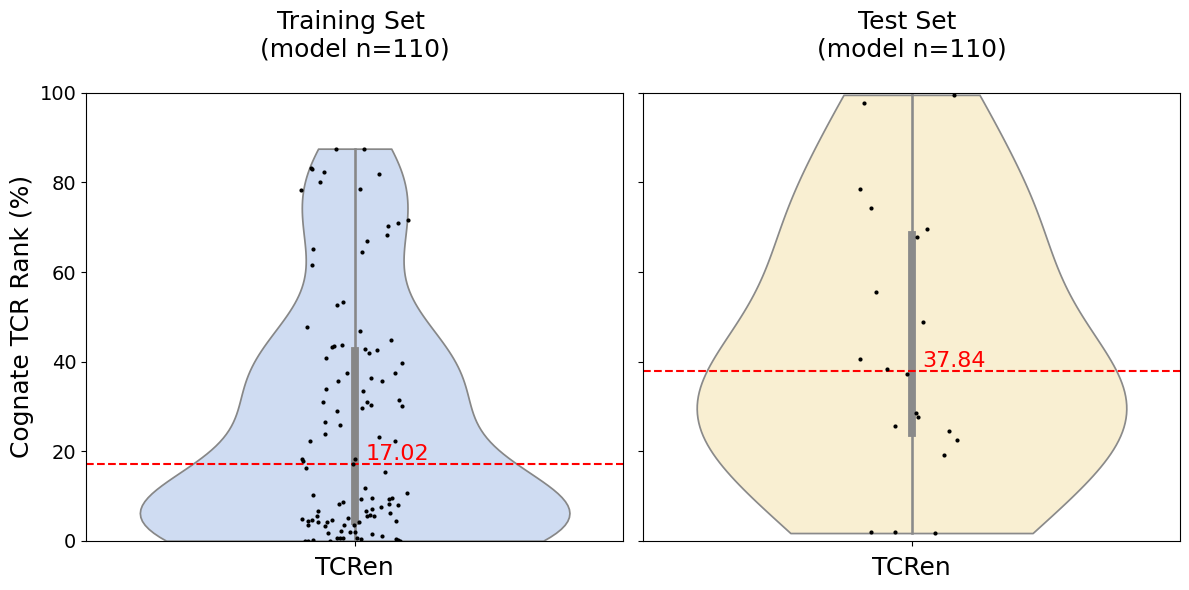

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test data
df_training = pd.read_csv('./output/training_set/mycode/training (n=110)/cognate_TCR_rank_training_110.csv')
df_test = pd.read_csv('./output/test_set/mycode/test (n=110)/cognate_TCR_rank_test_110.csv')

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Calculate medians for both datasets
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()

# Plot for the Training Set (now on axes[0])
sns.violinplot(data=df_training, y='percentage_lower', inner='box', color="#c9daf8ff", cut=0, ax=axes[0])
sns.stripplot(data=df_training, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

# Add a horizontal line and text to show the median for the training set
axes[0].axhline(median_training, color='red', linestyle='--', label=f'Median: {median_training:.2f}')
axes[0].text(0.02, median_training + 1, f'{median_training:.2f}', color='red', ha='left', fontsize=16)
axes[0].set_title("Training Set \n (model n=110) \n", fontsize=18)
axes[0].set_xlabel("TCRen", fontsize=18)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("Cognate TCR Rank (%)", fontsize=18)

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[1])
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

# Add a horizontal line and text to show the median for the test set
axes[1].axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes[1].text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize=16)
axes[1].set_title("Test Set \n (model n=110) \n", fontsize=18)
axes[1].set_xlabel("TCRen", fontsize=18)
axes[1].set_ylabel("")

# Set the Y-axis range for both plots
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()

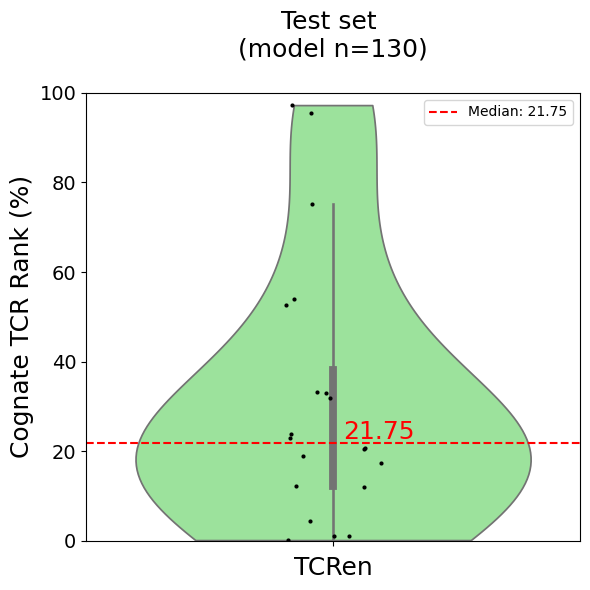

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/test_set/mycode/test (n=130)/cognate_TCR_rank_test_130.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()  # This median is calculated but not used here

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("Test set \n (model n=130) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

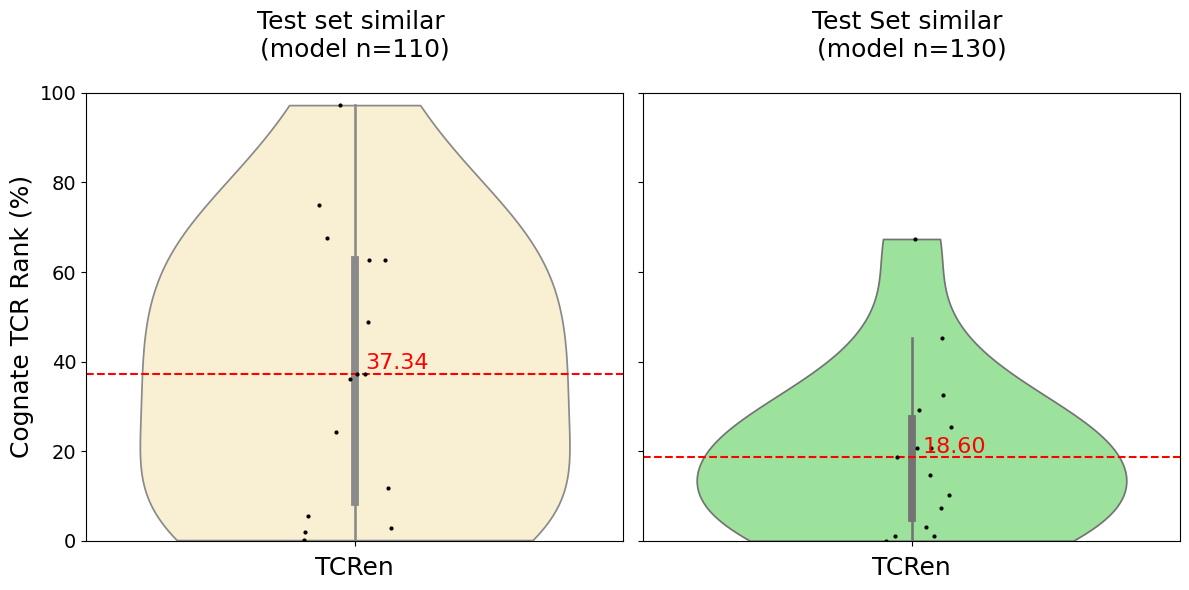

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_training = pd.read_csv('./output/test_set_similar/test_similar (n=110)/cognate_TCR_rank_test_similar.csv')
df_test = pd.read_csv('./output/test_set_similar/test_similar (n=130)/cognate_TCR_rank_test_similar_all.csv')
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Calculate medians for both datasets
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()

# Plot for the Training Set (now on axes[0])
sns.violinplot(data=df_training, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[0])
sns.stripplot(data=df_training, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

# Add a horizontal line and text to show the median for the training set
axes[0].axhline(median_training, color='red', linestyle='--', label=f'Median: {median_training:.2f}')
axes[0].text(0.02, median_training + 1, f'{median_training:.2f}', color='red', ha='left', fontsize=16)
axes[0].set_title("Test set similar \n (model n=110) \n", fontsize=18)
axes[0].set_xlabel("TCRen", fontsize=18)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("Cognate TCR Rank (%)", fontsize=18)

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes[1])
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

# Add a horizontal line and text to show the median for the test set
axes[1].axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes[1].text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize=16)
axes[1].set_title("Test Set similar \n (model n=130) \n", fontsize=18)
axes[1].set_xlabel("TCRen", fontsize=18)
axes[1].set_ylabel("")

# Set the Y-axis range for both plots
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()

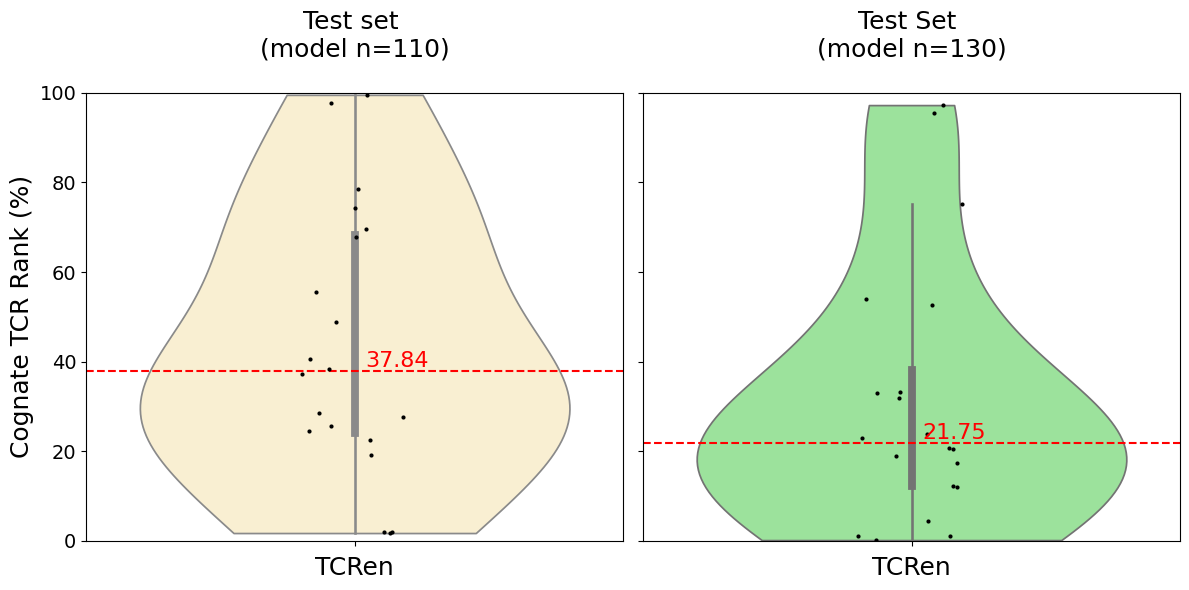

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_training = pd.read_csv('./output/test_set/mycode/test (n=110)/cognate_TCR_rank_test_110.csv')
df_test = pd.read_csv('./output/test_set/mycode/test (n=130)/cognate_TCR_rank_test_130.csv')

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Calculate medians for both datasets
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()

# Plot for the Training Set (now on axes[0])
sns.violinplot(data=df_training, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[0])
sns.stripplot(data=df_training, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

# Add a horizontal line and text to show the median for the training set
axes[0].axhline(median_training, color='red', linestyle='--', label=f'Median: {median_training:.2f}')
axes[0].text(0.02, median_training + 1, f'{median_training:.2f}', color='red', ha='left', fontsize=16)
axes[0].set_title("Test set \n (model n=110) \n", fontsize=18)
axes[0].set_xlabel("TCRen", fontsize=18)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("Cognate TCR Rank (%)", fontsize=18)

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes[1])
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

# Add a horizontal line and text to show the median for the test set
axes[1].axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes[1].text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize=16)
axes[1].set_title("Test Set \n (model n=130) \n", fontsize=18)
axes[1].set_xlabel("TCRen", fontsize=18)
axes[1].set_ylabel("")

# Set the Y-axis range for both plots
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()

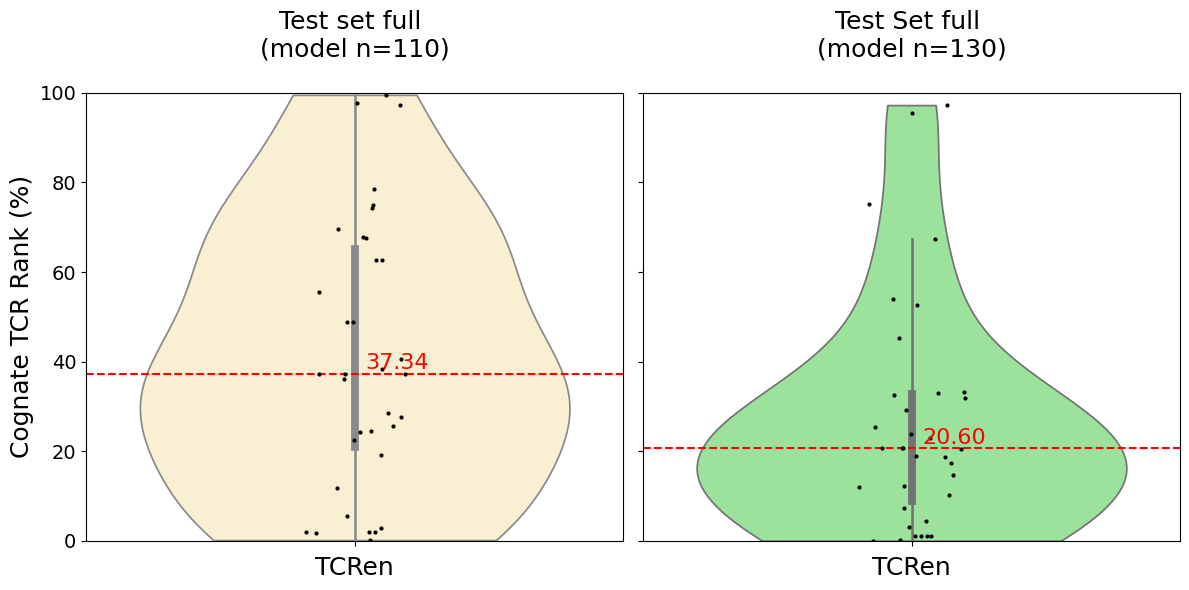

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_training = pd.read_csv('./output/test_set_similar/cognate_TCR_rank_alltest_110.csv')
df_test = pd.read_csv('./output/test_set_similar/cognate_TCR_rank_alltest_130.csv')
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Calculate medians for both datasets
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()

# Plot for the Training Set (now on axes[0])
sns.violinplot(data=df_training, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[0])
sns.stripplot(data=df_training, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

# Add a horizontal line and text to show the median for the training set
axes[0].axhline(median_training, color='red', linestyle='--', label=f'Median: {median_training:.2f}')
axes[0].text(0.02, median_training + 1, f'{median_training:.2f}', color='red', ha='left', fontsize=16)
axes[0].set_title("Test set full \n (model n=110) \n", fontsize=18)
axes[0].set_xlabel("TCRen", fontsize=18)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("Cognate TCR Rank (%)", fontsize=18)

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes[1])
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

# Add a horizontal line and text to show the median for the test set
axes[1].axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes[1].text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize=16)
axes[1].set_title("Test Set full \n (model n=130) \n", fontsize=18)
axes[1].set_xlabel("TCRen", fontsize=18)
axes[1].set_ylabel("")

# Set the Y-axis range for both plots
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()

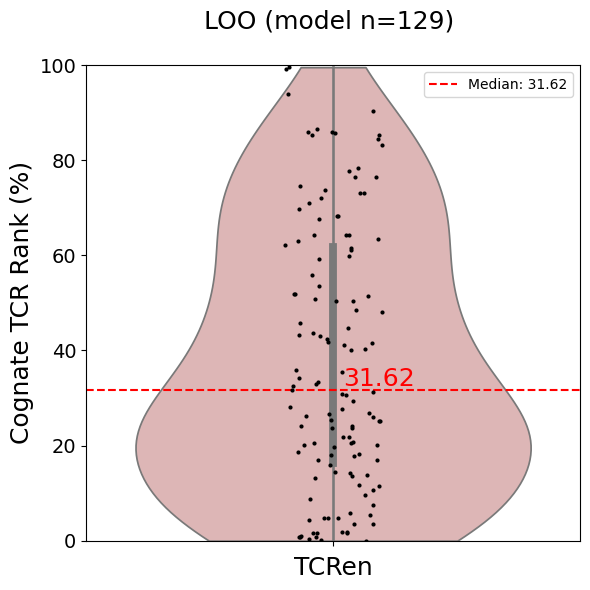

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data for test and training
df_test = pd.read_csv('./output/LOO/cognate_TCR_rank_LOO.csv')

# Calculate the medians
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()  # This median is calculated but not used here

# Set up the figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))  # Adjust size as needed

# Create the violin plot
sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#e3b0b0ff", cut=0, ax=axes)
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes)

# Add a horizontal line for the median
axes.axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes.text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left', fontsize = 18)

# Set titles and labels
axes.set_title("LOO (model n=129) \n", fontsize = 18)
axes.set_xlabel("TCRen", fontsize =18)  # You may want to adjust the label if it's actually a y-axis label
axes.set_ylabel("Cognate TCR Rank (%)", fontsize = 18)
axes.tick_params(axis='y', labelsize=14)

# Configure the Y-axis limits
axes.set_ylim(0, 100)

# Adjust the layout
plt.tight_layout()
plt.legend()
plt.show()

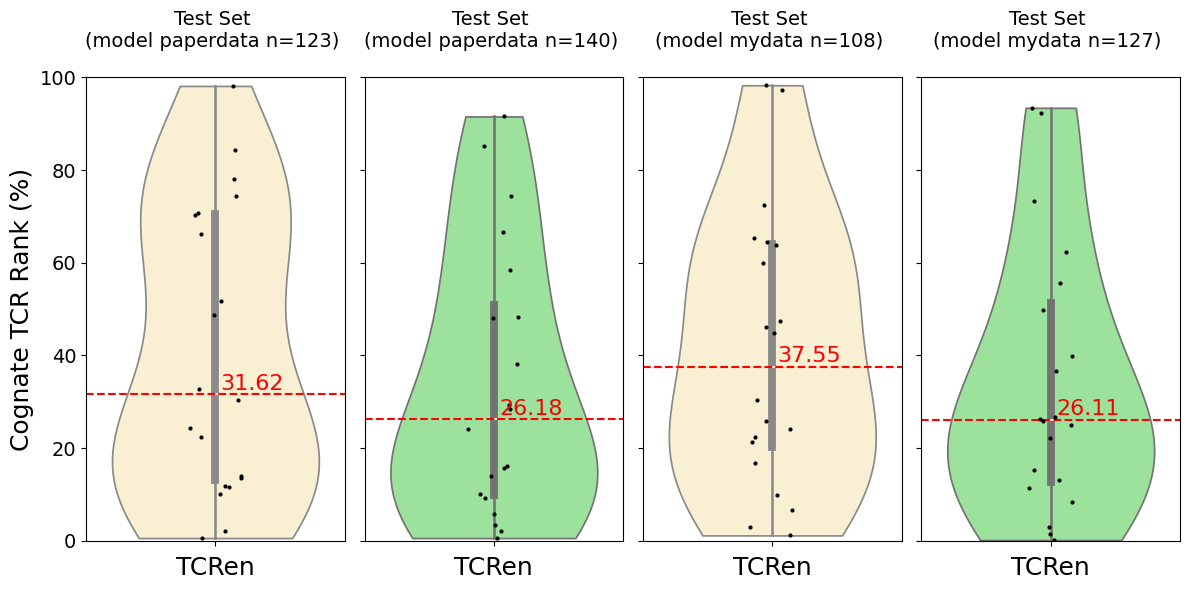

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training and test data
df_1= pd.read_csv('./output/test_set/theircode/mhcI + mhcII (n=123)/cognate_TCR_rank_test_retrained_papertrain.csv')
df_2= pd.read_csv('./output/test_set/theircode/mhcI + mhcII (n=140)/cognate_TCR_rank_test_retrained_paperall.csv')
df_3= pd.read_csv('./output/test_set/theircode/mhcI (n=108)/cognate_TCR_rank_test_retrained_mytrain.csv') 
df_4 = pd.read_csv('./output/test_set/theircode/mhcI (n=127)/cognate_TCR_rank_test_retrained_myall.csv')

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 4, figsize=(12, 6), sharey=True)

# Calculate medians for both datasets
median_1 = df_1['percentage_lower'].median()
median_2 = df_2['percentage_lower'].median()
median_3 = df_3['percentage_lower'].median()
median_4 = df_4['percentage_lower'].median()

# Plot for the Training Set (now on axes[0])
sns.violinplot(data=df_1, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[0])
sns.stripplot(data=df_1, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

# Add a horizontal line and text to show the median for the training set
axes[0].axhline(median_1, color='red', linestyle='--', label=f'Median: {median_1:.2f}')
axes[0].text(0.02, median_1 + 1, f'{median_1:.2f}', color='red', ha='left', fontsize=16)
axes[0].set_title("Test Set \n(model paperdata n=123) \n", fontsize=14)
axes[0].set_xlabel("TCRen", fontsize=18)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel("Cognate TCR Rank (%)", fontsize=18)

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_2, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes[1])
sns.stripplot(data=df_2, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

# Add a horizontal line and text to show the median for the test set
axes[1].axhline(median_2, color='red', linestyle='--', label=f'Median: {median_2:.2f}')
axes[1].text(0.02, median_2 + 1, f'{median_2:.2f}', color='red', ha='left', fontsize=16)
axes[1].set_title("Test Set \n(model paperdata n=140) \n", fontsize=14)
axes[1].set_xlabel("TCRen", fontsize=18)
axes[1].set_ylabel("")

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_3, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[2])
sns.stripplot(data=df_3, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[2])

# Add a horizontal line and text to show the median for the test set
axes[2].axhline(median_3, color='red', linestyle='--', label=f'Median: {median_3:.2f}')
axes[2].text(0.02, median_3 + 1, f'{median_3:.2f}', color='red', ha='left', fontsize=16)
axes[2].set_title("Test Set \n(model mydata n=108) \n", fontsize=14)
axes[2].set_xlabel("TCRen", fontsize=18)
axes[2].set_ylabel("")

# Plot for the Test Set (now on axes[1])
sns.violinplot(data=df_4, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes[3])
sns.stripplot(data=df_4, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[3])

# Add a horizontal line and text to show the median for the test set
axes[3].axhline(median_4, color='red', linestyle='--', label=f'Median: {median_4:.2f}')
axes[3].text(0.02, median_4 + 1, f'{median_4:.2f}', color='red', ha='left', fontsize=16)
axes[3].set_title("Test Set \n(model mydata n=127) \n", fontsize=14)
axes[3].set_xlabel("TCRen", fontsize=18)
axes[3].set_ylabel("")

# Set the Y-axis range for both plots
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)
axes[2].set_ylim(0, 100)
axes[3].set_ylim(0, 100)

# Adjust layout for a cleaner display
plt.tight_layout()
plt.show()

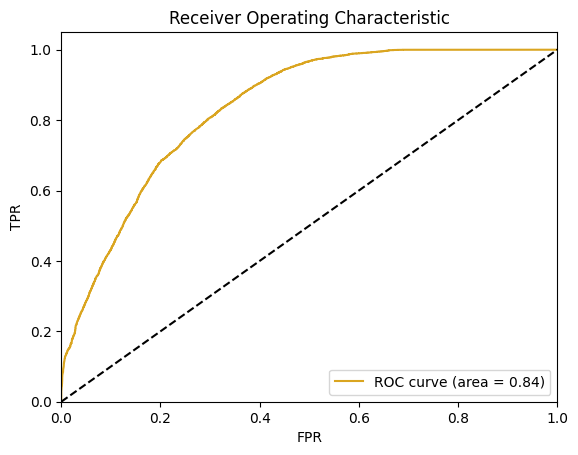

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Path to the folder where score files are located
scores_folder = './output/Benchmark/testing/'

# Initialize lists for true labels and scores for ROC calculation
y_true_all = []
y_scores_all = []

# Read the files and store the scores
for file in os.listdir(scores_folder):
    if file.startswith('scores_'):
        # Extract the reference TCR ID from the filename
        tcr_id_reference = file.split('_')[2].split('.')[0] 
        
        # Read the CSV file
        scores = pd.read_csv(os.path.join(scores_folder, file))
        
        # Group by tcr_id and extract the unique score
        unique_scores = scores.groupby('tcr_id').agg({'score_tcr_p': 'first'}).reset_index()
        score_dict = dict(zip(unique_scores['tcr_id'], unique_scores['score_tcr_p']))
        
        # Get the reference score for the specified tcr_id
        score_reference = score_dict.get(tcr_id_reference)

        # Check if the reference score is found
        if score_reference is not None:
            for tcr_id, score in score_dict.items():
                if tcr_id == tcr_id_reference:
                    continue  # Skip the reference TCR ID

                # Assign labels based on score comparison with the reference score
                if score < score_reference:  # Score less than reference
                    y_true_all.append(0)  # FP 
                else:  # Score greater than or equal to reference
                    y_true_all.append(1)  # TP

                y_scores_all.append(score)  # Store the scores

        else:
            print(f'TCR ID {tcr_id_reference} was not found.')

# Calculate ROC AUC for all results
auc = roc_auc_score(y_true_all, y_scores_all)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true_all, y_scores_all)
plt.figure()
plt.plot(fpr, tpr, color="#DAA520", label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos de test y training
df_test = pd.read_csv('./output/testing/cognate_MHC_rank_testing.csv')
df_training = pd.read_csv('./output/training/cognate_MHC_rank_training.csv')
df_sequences=pd.read_csv('./output/cognate_MHC_rank_sequences.csv')

# Crear la figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# Calcular las medianas
median_test = df_test['percentage_lower'].median()
median_training = df_training['percentage_lower'].median()
median_sequences = df_sequences['percentage_lower'].median()

sns.violinplot(data=df_test, y='percentage_lower', inner='box', color="#fff2cc90", cut=0, ax=axes[0])
sns.stripplot(data=df_test, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[0])

axes[0].axhline(median_test, color='red', linestyle='--', label=f'Median: {median_test:.2f}')
axes[0].text(0.02, median_test + 1, f'{median_test:.2f}', color='red', ha='left') 
axes[0].set_title("Test Set")
axes[0].set_xlabel("TCRen")
axes[0].set_ylabel("Cognate MHC Rank")

sns.violinplot(data=df_training, y='percentage_lower', inner='box', color="#c9daf8ff", cut=0, ax=axes[1])
sns.stripplot(data=df_training, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[1])

axes[1].axhline(median_training, color='red', linestyle='--', label=f'Median: {median_training:.2f}')
axes[1].text(0.02, median_training + 1, f'{median_training:.2f}', color='red', ha='left')  
axes[1].set_title("Training Set")
axes[1].set_xlabel("TCRen")
axes[1].set_ylabel("")

sns.violinplot(data=df_sequences, y='percentage_lower', inner='box', color="lightgreen", cut=0, ax=axes[2])
sns.stripplot(data=df_sequences, y='percentage_lower', color="black", size=3, jitter=True, ax=axes[2])

axes[2].axhline(median_sequences, color='red', linestyle='--', label=f'Median: {median_sequences:.2f}')
axes[2].text(0.02, median_sequences + 1, f'{median_sequences:.2f}', color='red', ha='left')  
axes[2].set_title("Sequences Set")
axes[2].set_xlabel("TCRen")
axes[2].set_ylabel("")

# Configurar el eje Y para ambos gráficos
axes[0].set_ylim(0, 100)
axes[1].set_ylim(0, 100)
axes[2].set_ylim(0, 100)

# Añadir un título general
fig.suptitle("Cognate MHC Rank Comparison: Test vs Training vs Sequences", fontsize=16)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [57]:
import os
import pandas as pd

pdb_test = []
for file in os.listdir("./input/input_test/"):
    if file.endswith('.csv'):
        pdb_id = file.split('_')[0]  
        pdb_test.append(pdb_id)

# Cargar el DataFrame
df = pd.read_csv('./structures_annotation/summary_clustering.csv')

pdb_id_similar = []
for pdb_id in pdb_test:
    row = df[df['pdb_id'] == pdb_id]
    if not row.empty: 
        cluster_id = row['cluster_id'].values[0]
        pdb_id_same_cluster = df[df['cluster_id'] == cluster_id]['pdb_id'].values
        for pdb_id_s in pdb_id_same_cluster:
            if pdb_id_s != pdb_id:  
                pdb_id_similar.append(pdb_id_s)

print(len(pdb_id_similar)) 

for pdb_id in pdb_id_similar:
    input_path=f'./input/input_all/{pdb_id}_df.csv'
    output_dir=f'./input/input_test_similar/{pdb_id}_df.csv'
    mv_cmmand=f'cp {input_path} {output_dir}'
    os.system(mv_cmmand)
    

15


In [107]:
alleles_df = pd.read_csv('./input/sequences_similar_allinfo.csv')
tcr_id=25245
alleles_df = pd.read_csv('./input/sequences_similar_allinfo.csv')
reference_allele = alleles_df.loc[alleles_df['tcr_id'] == tcr_id]['mhci_allele'].values[0] 
reference_allele = reference_allele.replace("HLA-", "") + ":01:01"


In [108]:
reference_allele

'A*02:01:01:01'